## 타이타닉 데이터 분석(feat. 간단분석, 흐름만체크!)

### 진행해야 할 절차 리스트업
 
1. 데이터 입력 및 확인 -> 전처리가 필요할 경우 전처리 진행
2. 탐색적 데이터 분석 -> 다양한 시각화를 통해서 데이터를 전체적으로 이해하고, 모델링에 필요한 정보 및 변수 선택의 논리를 정리함
3. feature engineering -> 모델의 성능을 높이기 위해 변수(feature) 변환 등의 engineering을 진행함
4. 모델링 및 결과확인 -> 종속변수의 형태에 따라 적절한 모델을 scikit-learn을 활용하여 모델링을 진행하고, 파라미터 튜닝등의 과정을 거쳐 최종적인 모델을 생성하고 결과를 확인함.

### 1.데이터 입력 및 확인

In [1]:
import pandas as pd
import numpy as np

In [5]:
train_data = pd.read_csv('titanic.csv')
train_data.shape

(891, 12)

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터들의 통계량을 살펴보기 위해 describe() 함수를 이용함. 이때는 연속형 변수에 대한 통계량만 표현되므로, string 형태는 제외됨.

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


위의 describe 결과를 살펴보면 'Age' 변수의 count수가 891보다 적은것을 알 수 있으며, 이는 결측치가 존재한다는 의미임. 데이터에 결측치가 존재하므로 모든 변수에 대해 얼마나 결측치가 존재하는지 한번 체크함.

In [11]:
for feature in train_data.columns:
    if train_data[feature].isnull().sum() > 0:
        print('column {} null data count : {}'.format(feature,  train_data[feature].isnull().sum()))

column Age null data count : 177
column Cabin null data count : 687
column Embarked null data count : 2


학습 데이터에 age의 경우 177개(약20%), cabin의 경우 687개(약 77%), embarked의 경우 2개의 결측치가 존재함. 이에 대한 처리는 데이터의 특성을 좀 더 이해한 후 진행하는 것이 나아보임.

종속변수인 'survivied' 변수의 분포를 살펴볼 필요가 있음. 만약에 종속변수의 분포가 한쪽으로 크게 치우쳐져 있다면, 모델의 성능이 제대로 나오지 않을 수 있으므로, 어느정도 균형있게 분포되어 있는지 확인함.

In [23]:
survived_ratio = train_data['Survived'].value_counts()/train_data.shape[0]
print(survived_ratio)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


사고를 통해 산 사람은 전체의 약 40프로정도이며, 이는 완벽히 balance 데이터(5:5)는 아니지만 이정도는 모델의 성능에 크게 영향을 주지 않을 것으로 판단됨

### 2. 탐색적 데이터 분석

우선 데이터 별 분포에 대해서 확인을 함.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

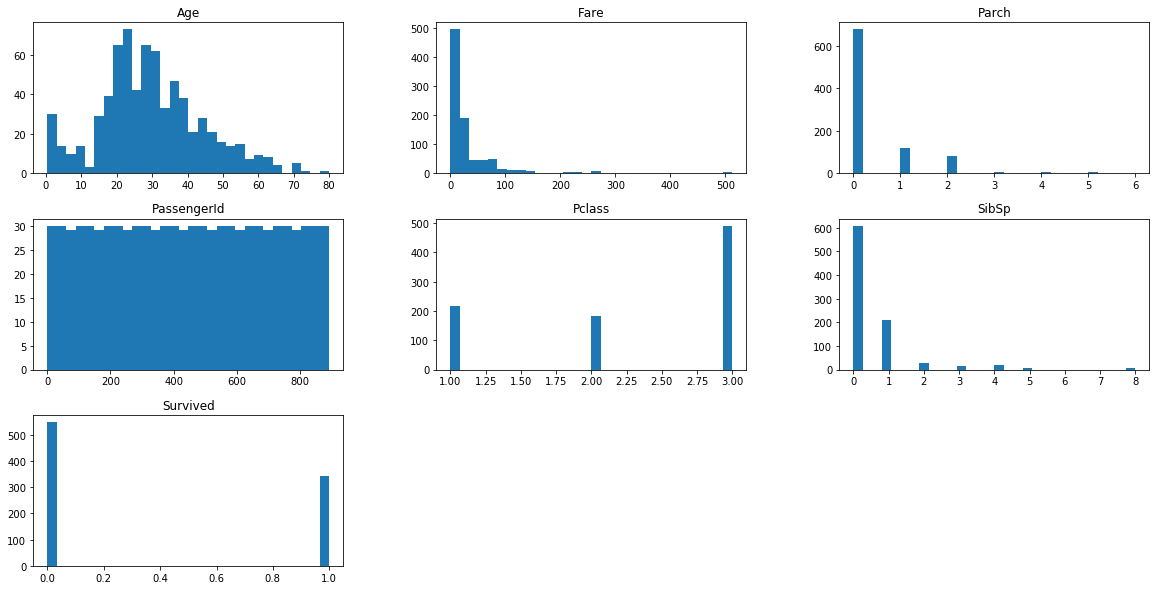

In [27]:
# 각 변수들의 분포 확인
train_data.hist(bins=30,figsize=(20,10), grid=False);

성별의 경우는 명확히 string으로 구분되어 있지만, 실제적으로 Pclass의 경우 데이터 타입은 integer이지만 이산형(categorical) 변수로 활용될 수 있음. 이에 대해서 각각 종속변수인 생존률이 어느정도 차이나는지 확인해보자.

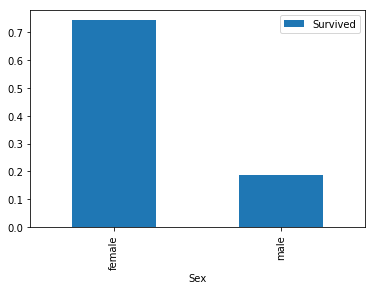

In [31]:
sex_pivot = train_data.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

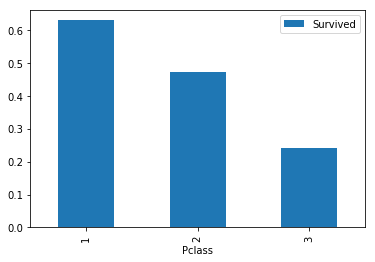

In [33]:
pclass_pivot = train_data.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

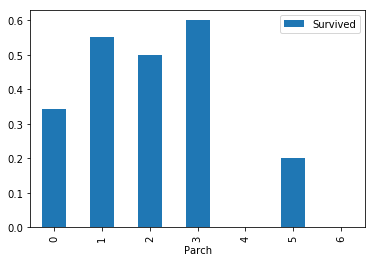

In [36]:
parch_pivot = train_data.pivot_table(index="Parch",values="Survived")
parch_pivot.plot.bar()
plt.show()

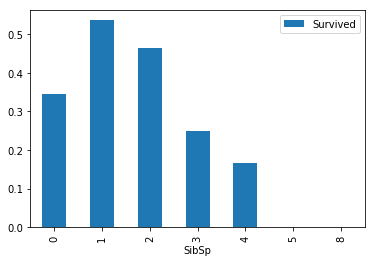

In [37]:
sib_pivot = train_data.pivot_table(index="SibSp",values="Survived")
sib_pivot.plot.bar()
plt.show()

위의 결과를 보면 성별과 Pclass라는 변수에 대해서 명확하게 생존률이 나뉘는것을 확인 할 수 있음. 즉, 남성의 경우에는 생존률이 상당히 떨어지며, Pclass가 커질수록, 즉, 가격이 싼 클래스의 호실일수록 생존률이 떨어짐. 이는 두개의 변수가 생존률을 판단하는데 중요한 요소가 될것임을 의미함.

나이에 따라 생존 여부를 확인하는 것도 중요할 것으로 판단되므로, 나이의 분포에 따라 생존여부를 살펴봄. 나이는 연속형이므로 분포의 형태로 살펴볼수 있음.

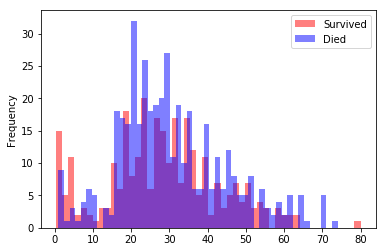

In [40]:
survived = train_data[train_data["Survived"] == 1]
died = train_data[train_data["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

### 3. Feature Engineering

### 변수 생성

#### Age 그룹화

우선 나이를 연령대로 묶어서 모델링에 추가정보로 사용하는 것이 좋아보임. 그 이유는 나이는 연속형이지만 1살 전후 차이가 중요하기 보다는 유아, 어린이, 성인, 노인 이런 형태의 구분이 생존과 좀 더 타당한 연관성이 있을 것으로 예상되기 때문

이와 같은 categorize는 pandas의 pd.cut을 이용하면 편하게 이용할 수 있음. 아래의 함수를 확인!

In [53]:
def categorize_age(data):
    # dataframe을 그대로 바꿀경우 기존의 dataframe이 변경되므로 이를 copy해서 사용함
    featured_data = data.copy()
    featured_data['Age'] = featured_data['Age'].fillna(-1)
    
    region = [-2, 0, 10, 20, 60, 100] 
    label = ['missing','child', 'teenager', 'adult', 'senior']
    featured_data['Age_category'] = pd.cut(featured_data['Age'], region, labels=label)
    
    return featured_data

In [62]:
featured_data = categorize_age(train_data)
featured_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


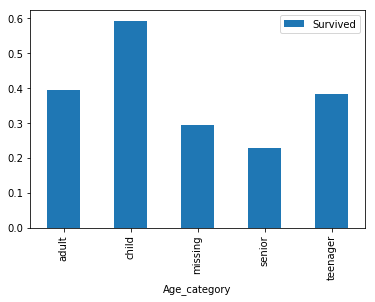

In [63]:
age_cat_pivot = featured_data.pivot_table(index="Age_category",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

나이대를 구분했을 때 좀 더 명확하게 생존률이 구분되는 것을 확인 할 수 있다. 10세미만의 아이들은 먼저 살렸기 때문에 생존률이 높고, 60세 이상의 senior들은 재빨리 대응하지 못해 생존률이 제일 낮은것으로 보임.

#### Family 변수 생성

변수 중에 sibsp는 함께 탑승한 형제, 배우자의 수를 의미하고, parch는 함께 탑승한 부모, 아이의 수를 의미함. 생존함에 있어서 형제, 배우자, 부모, 아이의 차이는 없을 것으로 예상됨(물론, 아이의 경우를 먼저 살리면서 생존률이 높아질테지만, 변수상에서 아이를 따로 구분하지 않으며, 아이는 나이 변수로 어느정도 커버된다고 생각)

그러므로, 이 두 변수를 하나로 합쳐서 가족으로 생각하도록 함.

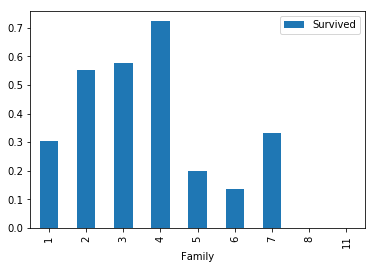

In [64]:
featured_data['Family'] = featured_data['SibSp'] + featured_data['Parch'] + 1 # 본인을 포함해서 가족수로 count
family_pivot = featured_data.pivot_table(index="Family",values="Survived")
family_pivot.plot.bar()
plt.show()

가족의 수가 너무 많거나 적어도 생존률이 떨어지는 것을 확인 할 수 있음. 
family 변수를 사용된 두 변수는 제거하도록 함. 아래 코드에서 유의해야할 점은 featured_data에서 두 변수를 제거하고 다시 featured_data로 넣었기 때문에 한번 실행 후엔 ['SibSp', 'Parch'] 변수가 없다는 점 기억할 것!

In [65]:
featured_data=featured_data.drop(['SibSp', 'Parch'], axis=1) # axis=1 means columns

In [66]:
featured_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Age_category,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,adult,1


### dummy 변수 생성

더미 변수란, 이산형의 의미를 변수가 지니고 있을 때, 이를 one-hot encodiing으로 변환시켜주는 것을 의미함. 현재 존재하는 변수 중에서는 대표적으로 Pclass 변수가 이에 해당함. 또한, 알고리즘들이 문자형 변수를 제대로 인식하지 못하므로, sex, age_category 변수들도 변환시켜줘야 함

더미 변수의 생성은 pd.get_dummies를 활용하면 됨. 이대는 생성되는 데이터는 더미 변수만 생성되므로, 이를 기존의 데이터와 합쳐주는 작업이 추가로 진행되어야 함.

In [67]:
# pclass dummies
pclass_dummies = pd.get_dummies(featured_data['Pclass'], prefix='Pclass')
pclass_dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


바로 위의 featured_data를 보면 첫번째 행이 3인것을 확인 할 수 있음. 이는 더미로 했을 때 [0,0,1]로 세번째 인덱스에 해당하는 열에 1로 표현됨. 이를 one-hot encoding 이라고 함.

In [68]:
featured_data = pd.concat([featured_data, pclass_dummies], axis=1)

In [69]:
featured_data=featured_data.drop(['Pclass'], axis=1)
featured_data.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Age_category,Family,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,adult,2,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,adult,2,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,adult,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,adult,2,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,adult,1,0,0,1


In [70]:
# sex dummies
sex_dummies = pd.get_dummies(featured_data['Sex'], prefix='Sex')
sex_dummies.head()
featured_data = pd.concat([featured_data, sex_dummies], axis=1)
featured_data=featured_data.drop(['Sex'], axis=1)
featured_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Embarked,Age_category,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,adult,2,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,adult,2,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,adult,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,adult,2,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,adult,1,0,0,1,0,1


In [71]:
# age_category dummies
age_dummies = pd.get_dummies(featured_data['Age_category'], prefix='Age_category')
age_dummies.head()
featured_data = pd.concat([featured_data, age_dummies], axis=1)
featured_data=featured_data.drop(['Age_category'], axis=1)
featured_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Embarked,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_category_adult,Age_category_child,Age_category_missing,Age_category_senior,Age_category_teenager
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,2,0,0,1,0,1,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,2,1,0,0,1,0,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,1,0,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,2,1,0,0,1,0,1,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,1,0,0,1,0,1,1,0,0,0,0


#### 불필요한 변수 제거

최종적으로 모델링에 불필요한 변수를 제거함. passengerid와 name은 의미가 없으며, ticket과 cabin, embarked또한 제거함. 물론 ticket과 embark의 경우 그 문자열의 의미에 따라 추가적인 정보가 될 수 있으나, 본 실습에서는 이와같은 디테일은 다루지 않겠다.

In [72]:
featured_data=featured_data.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis=1)
featured_data.head()

,Survived,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_category_adult,Age_category_child,Age_category_missing,Age_category_senior,Age_category_teenager
0,0,22.0,7.2500,2,0,0,1,0,1,1,0,0,0,0
1,1,38.0,71.2833,2,1,0,0,1,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,1,0,1,0,0,0,0
3,1,35.0,53.1000,2,1,0,0,1,0,1,0,0,0,0
4,0,35.0,8.0500,1,0,0,1,0,1,1,0,0,0,0


### 4. 모델링 및 결과 확인

수업시간에 다루었던 알고리즘 중, 분류 문제에 해당하는 알고리즘 중 일부를 사용함. 파라미터 튜닝도 필요하므로, 이를 진행함.

우선 데이터를 train/test로 구분함

In [73]:
from sklearn.model_selection import train_test_split
X = featured_data.drop(['Survived'], axis=1)
y = featured_data['Survived']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((712, 13), (179, 13))

배운 알고리즘 중, SVC, RandomForest, XGboost 알고리즘을 적용하여 파라미터 튜닝 및 결과를 얻어본다. 우선 파이프라인을 이용하여 진행할 예정이며, 주요 파라미터를 미리 정의함

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_pipes = [
    ('SVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])),
    ('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])),
    ('XG', Pipeline([('Scaler', StandardScaler()),('XG', XGBClassifier(n_jobs=-1))]))                
]

model_params = {
    'SVC' : [{'SVC__kernel':['rbf', 'poly', 'sigmoid'], 'SVC__C': [0.001, 0.01, 0.1, 1], 'SVC__gamma': [0.001, 0.01, 0.1, 1]}],
    'XG' : [{"XG__n_estimators": range(100,300,50),"XG__max_depth": range(4,7,1),"XG__learning_rate": [1e-4, 1e-3, 1e-2, 1e-1], 'XG__min_child_weight': [1,3,5], 'XG__subsample': [0.8, 0.9, 1.0], 'XG__colsample_bytree': [0.8, 0.9, 1.0]}],
    'RF' : [{"RF__n_estimators": range(100,300,50),"RF__max_depth": range(4,7,1),"RF__min_samples_split": [2,3,4,5],"RF__bootstrap": [True, False]}]
}

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

for model in model_pipes:
    model_name, model_pipe = model
    param = model_params[model_name]
    grid_search = GridSearchCV(model_pipe, param_grid = param, cv=4, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    print("model : {} -> best cross-validation training accuracy is {}".format(model_name, grid_search.best_score_))
    best_model = grid_search.best_estimator_
    pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("model : {} -> final test accuracy is {}".format(model_name, accuracy))
    

model : SVC -> best cross-validation training accuracy is 0.8286516853932584
model : SVC -> final test accuracy is 0.8156424581005587
model : RF -> best cross-validation training accuracy is 0.8300561797752809
model : RF -> final test accuracy is 0.8156424581005587
model : XG -> best cross-validation training accuracy is 0.8356741573033708
model : XG -> final test accuracy is 0.8268156424581006
